In [8]:
import numpy as np
import seaborn as sns
import cv2
from matplotlib.pyplot import imshow
import tensorflow as tf
from skimage import transform
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [9]:


# Data paths
train_data_dir = 'E:\\fruits_train\\'
test_data_dir = 'E:\\fruits_test\\'


In [10]:

# Image parameters
img_width, img_height = 100, 100
batch_size = 32
epochs = 5


In [11]:

# Data augmentation for training set
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [12]:

# Rescaling for test set (no augmentation)
test_data_gen = ImageDataGenerator(rescale=1.0 / 255)


In [13]:


# Loading the training data
train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)


Found 736 images belonging to 2 classes.


In [14]:

# Loading the test data
test_generator = test_data_gen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 19 images belonging to 2 classes.


In [15]:

# Model definition
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])


In [16]:

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])


In [17]:

# Print model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 10, 10, 128)      

In [18]:

# Train the model
model.fit(train_generator, epochs=epochs)


Epoch 1/5


c:\Users\mohiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


13/23 [===============>..............] - ETA: 7s - loss: 0.6545 - accuracy: 0.6538

c:\Users\mohiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\TiffImagePlugin.py:864: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


23/23 [==============================] - 17s 656ms/step - loss: 0.6252 - accuracy: 0.6522
Epoch 2/5
23/23 [==============================] - 14s 611ms/step - loss: 0.4449 - accuracy: 0.7853
Epoch 3/5
23/23 [==============================] - 15s 662ms/step - loss: 0.3522 - accuracy: 0.8573
Epoch 4/5
23/23 [==============================] - 16s 677ms/step - loss: 0.3103 - accuracy: 0.8791
Epoch 5/5
23/23 [==============================] - 16s 690ms/step - loss: 0.2689 - accuracy: 0.9062


In [19]:

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)


1/1 [==============================] - 1s 913ms/step - loss: 0.1551 - accuracy: 0.9474


In [20]:
print("Test Loss:", test_loss)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Test Loss: 0.15512458980083466
Test Accuracy: 94.74%


In [21]:

# Make predictions on the test data
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).flatten()
y_true = test_generator.classes


1/1 [==============================] - 1s 654ms/step


In [22]:

# Calculate accuracy and confusion matrix
test_accuracy = accuracy_score(y_true, y_pred)
confusion_mat = confusion_matrix(y_true, y_pred)

print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Confusion Matrix:")
print(confusion_mat)


Test Accuracy: 94.74%
Confusion Matrix:
[[ 8  0]
 [ 1 10]]


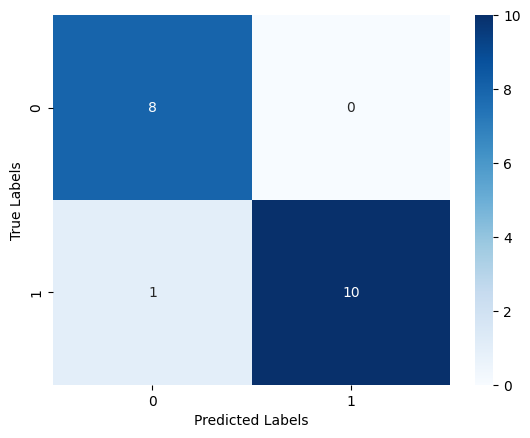

In [23]:

# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


1/1 [==============================] - 0s 61ms/step
It's an apple


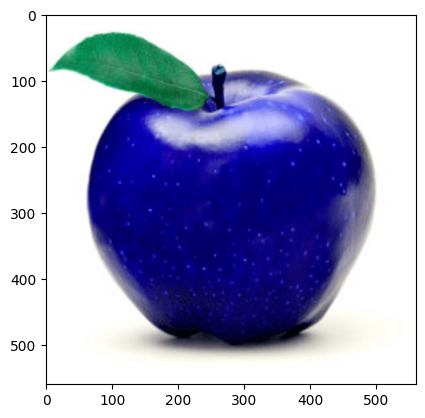

In [26]:

# Load and predict on a single image
image_path = "apple.png"
img = cv2.imread(image_path)
imshow(img)
resized_img = transform.resize(img, (img_width, img_height))

prediction = model.predict(resized_img.reshape(1, img_width, img_height, 3))
if prediction < 0.5:
    print("It's an apple")
else:
    print("It's a banana")


In [25]:
model.save("model.h5")

c:\Users\mohiz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model("model.h5")